#Understand the Data Structures

In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("/content/Consumption Dataset - Dataset.csv")
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
0,1/1/2023 19:35,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88
1,1/1/2023 10:07,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37
2,1/1/2023 11:26,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28
3,1/1/2023 13:53,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53
4,1/1/2023 22:28,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90
...,...,...,...,...,...,...,...,...
6570,1/1/2024 21:03,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02
6571,1/1/2024 21:15,Anderson's Bar,Rum,Malibu,8.530000e-14,1743.64,175.05,1568.59
6572,1/1/2024 18:34,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06
6573,1/1/2024 22:46,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6575 entries, 0 to 6574
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date Time Served      6575 non-null   object 
 1   Bar Name              6575 non-null   object 
 2   Alcohol Type          6575 non-null   object 
 3   Brand Name            6575 non-null   object 
 4   Opening Balance (ml)  6575 non-null   float64
 5   Purchase (ml)         6575 non-null   float64
 6   Consumed (ml)         6575 non-null   float64
 7   Closing Balance (ml)  6575 non-null   float64
dtypes: float64(4), object(4)
memory usage: 411.1+ KB


In [4]:
df.describe()

,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml)
count,6575.000000,6575.000000,6575.000000,6575.000000
mean,2468.397180,315.841757,299.419264,2484.811748
std,2284.552895,582.120264,191.903874,2302.363298
min,0.000000,0.000000,0.000000,0.000000
25%,619.135000,0.000000,156.640000,611.000000
50%,1848.440000,0.000000,300.390000,1849.840000
75%,3853.020000,526.345000,450.870000,3906.050000
max,11862.520000,1999.840000,1180.580000,11862.520000


In [5]:
df.columns

Index(['Date Time Served', 'Bar Name', 'Alcohol Type', 'Brand Name',
       'Opening Balance (ml)', 'Purchase (ml)', 'Consumed (ml)',
       'Closing Balance (ml)'],
      dtype='object')

#Data Cleaning

In [6]:
# Step 1: Convert 'Date Time Served' to datetime safely
df['Date Time Served'] = pd.to_datetime(df['Date Time Served'], errors='coerce')

# Step 2: Drop rows where any critical column is missing or 'Date Time Served' conversion failed (became NaT)
required_columns = ["Date Time Served", "Bar Name", "Alcohol Type", "Consumed (ml)", "Closing Balance (ml)"]
df = df.dropna(subset=required_columns)


In [7]:
# List of columns to convert
numeric_cols = ["Consumed (ml)", "Closing Balance (ml)", "Opening Balance (ml)", "Purchase (ml)"]

# Convert all to numeric, coerce errors, and fill NaNs with 0
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)


In [8]:
# Step 1: Remove rows with extremely small closing balances (likely floating point errors)
df = df.loc[df["Closing Balance (ml)"] > 1e-10]

# Step 2: Extract useful time-based features for analysis
df["Date"] = df["Date Time Served"].dt.normalize().dt.date  # Just the date (00:00:00 removed)
df["Hour"] = df["Date Time Served"].dt.hour                 # Hour of day (0-23)
df["Day of Week"] = df["Date Time Served"].dt.day_name()    # Day name (e.g., Monday)


<ipython-input-8-a7a59a0089e0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date Time Served"].dt.normalize().dt.date  # Just the date (00:00:00 removed)
<ipython-input-8-a7a59a0089e0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Date Time Served"].dt.hour                 # Hour of day (0-23)
<ipython-input-8-a7a59a0089e0>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [9]:
df

,Date Time Served,Bar Name,Alcohol Type,Brand Name,Opening Balance (ml),Purchase (ml),Consumed (ml),Closing Balance (ml),Date,Hour,Day of Week
0,2023-01-01 19:35:00,Smith's Bar,Rum,Captain Morgan,2.555040e+03,1824.84,0.00,4379.88,2023-01-01,19,Sunday
1,2023-01-01 10:07:00,Smith's Bar,Wine,Yellow Tail,1.344370e+03,0.00,0.00,1344.37,2023-01-01,10,Sunday
2,2023-01-01 11:26:00,Johnson's Bar,Vodka,Grey Goose,1.034280e+03,0.00,0.00,1034.28,2023-01-01,11,Sunday
3,2023-01-01 13:53:00,Johnson's Bar,Beer,Coors,2.194530e+03,0.00,0.00,2194.53,2023-01-01,13,Sunday
4,2023-01-01 22:28:00,Johnson's Bar,Wine,Yellow Tail,1.020900e+03,0.00,0.00,1020.90,2023-01-01,22,Sunday
...,...,...,...,...,...,...,...,...,...,...,...
6570,2024-01-01 21:03:00,Anderson's Bar,Beer,Coors,2.467080e+03,0.00,321.06,2146.02,2024-01-01,21,Monday
6571,2024-01-01 21:15:00,Anderson's Bar,Rum,Malibu,8.530000e-14,1743.64,175.05,1568.59,2024-01-01,21,Monday
6572,2024-01-01 18:34:00,Anderson's Bar,Whiskey,Jack Daniels,4.192660e+03,0.00,197.60,3995.06,2024-01-01,18,Monday
6573,2024-01-01 22:46:00,Thomas's Bar,Vodka,Absolut,2.424950e+03,0.00,128.52,2296.43,2024-01-01,22,Monday


In [10]:
# Validate Closing Balance (ml) for consistency (optional, can be skipped if not needed)
df["Calculated Closing Balance (ml)"] = df["Opening Balance (ml)"] + df["Purchase (ml)"] - df["Consumed (ml)"]
balance_discrepancies = df[abs(df["Closing Balance (ml)"] - df["Calculated Closing Balance (ml)"]) > 1e-6]
if not balance_discrepancies.empty:
    print("Warning: Closing Balance Discrepancies Detected")
    print(balance_discrepancies[["Date Time Served", "Bar Name", "Alcohol Type", "Closing Balance (ml)", "Calculated Closing Balance (ml)"]])

        Date Time Served       Bar Name Alcohol Type  Closing Balance (ml)  \
42   2023-01-03 20:00:00    Brown's Bar      Whiskey                 598.0   
58   2023-01-04 10:45:00    Smith's Bar         Beer                1950.0   
99   2023-01-06 13:10:00  Johnson's Bar         Wine                1180.0   
125  2023-01-07 14:01:00   Taylor's Bar      Whiskey                2010.0   
143  2023-01-08 14:46:00   Taylor's Bar          Rum                1290.0   
...                  ...            ...          ...                   ...   
1559 2023-03-26 18:54:00    Smith's Bar      Whiskey                4670.0   
1567 2023-03-26 11:47:00   Taylor's Bar         Wine                4000.0   
1574 2023-03-26 22:57:00   Thomas's Bar      Whiskey                2300.0   
1583 2023-03-27 15:36:00    Brown's Bar      Whiskey                3510.0   
1593 2023-03-28 19:02:00    Smith's Bar          Rum                4890.0   

      Calculated Closing Balance (ml)  
42                     

#DATA EXPLORATION

In [28]:
daily_consumption = (
    df
    .groupby(['Date', 'Bar Name', 'Alcohol Type'], as_index=False)['Consumed (ml)']
    .sum()
)


In [29]:
# Total consumption (ml) by alcohol type
total_consumption = daily_consumption.groupby("Alcohol Type", as_index=False)["Consumed (ml)"].sum()

print("Total Consumption by Alcohol Type (Liters):")
# Convert ml to liters and round to 2 decimals
print((total_consumption["Consumed (ml)"] / 1000).round(2))


Total Consumption by Alcohol Type (Liters):
0    385.36
1    380.99
2    396.67
3    373.30
4    368.98
Name: Consumed (ml), dtype: float64


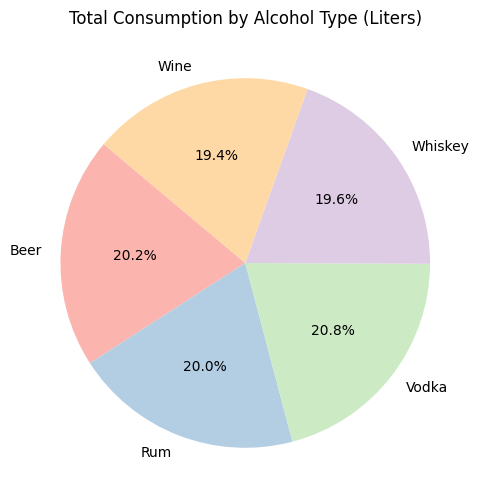

In [30]:
plt.figure(figsize=(8, 6))
plt.pie(
    total_consumption["Consumed (ml)"] / 1000,
    labels=total_consumption["Alcohol Type"],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors
)
plt.title("Total Consumption by Alcohol Type (Liters)")
plt.savefig("total_consumption_pie.png")
plt.show()
plt.close()


In [31]:
# Get unique bar names and alcohol types
bars = daily_consumption["Bar Name"].dropna().unique()
alcohol_types = daily_consumption["Alcohol Type"].dropna().unique()

# Display in sorted order and cleaner output
print("✅ Unique Bar Names:")
for i, bar in enumerate(sorted(bars), 1):
    print(f"{i}. {bar}")

print("\n✅ Unique Alcohol Types:")
for i, alc in enumerate(sorted(alcohol_types), 1):
    print(f"{i}. {alc}")


✅ Unique Bar Names:
1. Anderson's Bar
2. Brown's Bar
3. Johnson's Bar
4. Smith's Bar
5. Taylor's Bar
6. Thomas's Bar

✅ Unique Alcohol Types:
1. Beer
2. Rum
3. Vodka
4. Whiskey
5. Wine


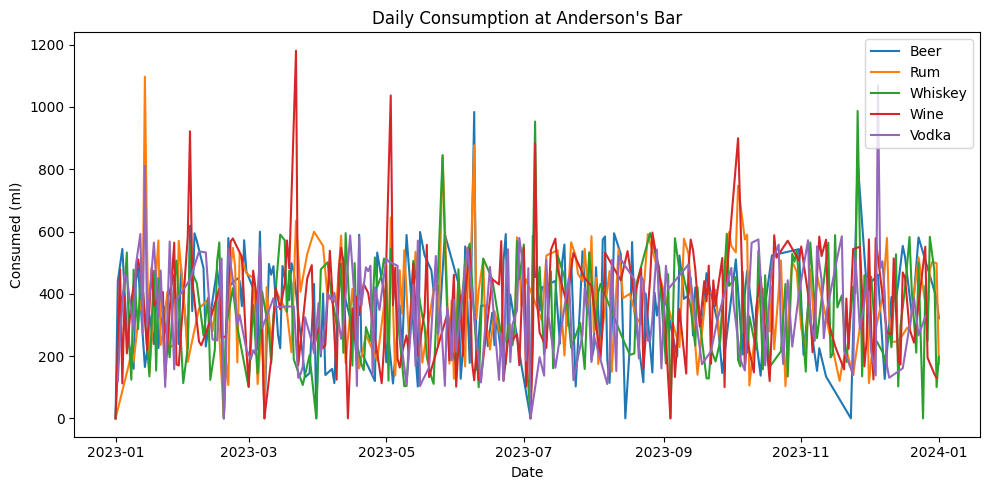

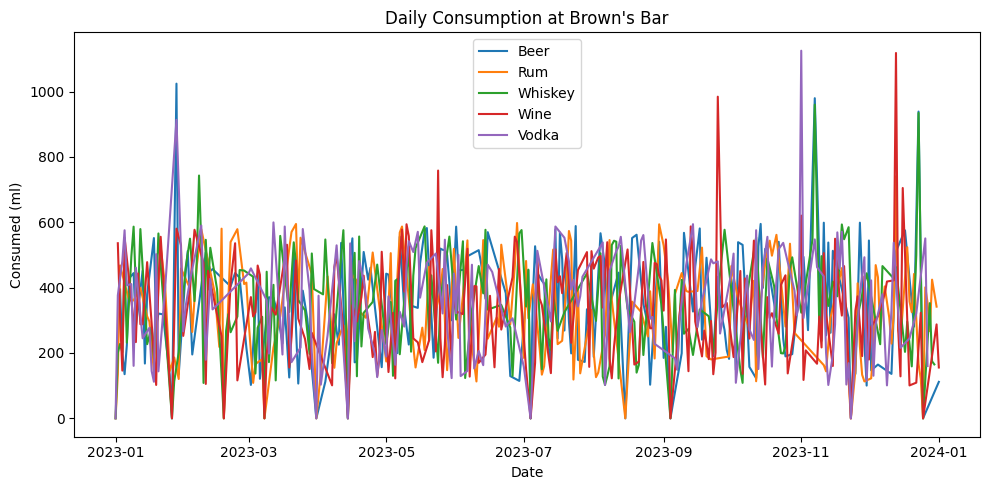

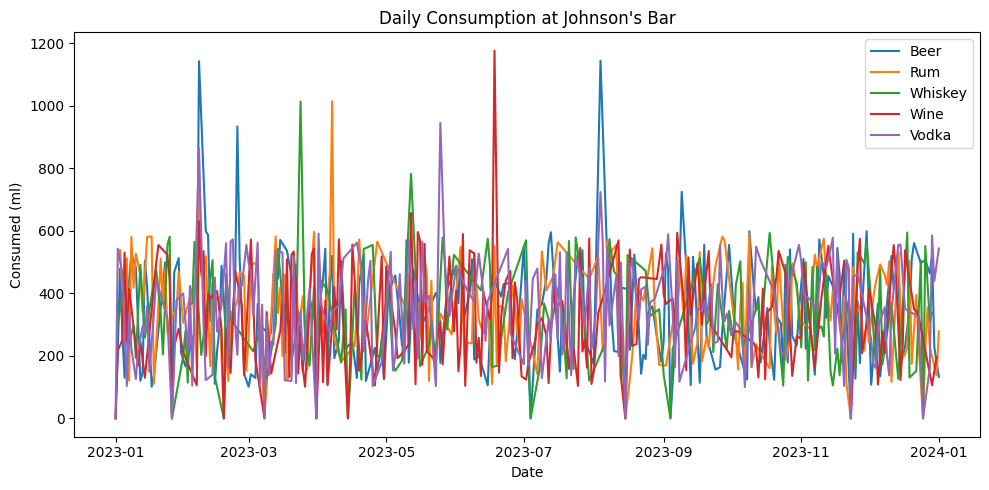

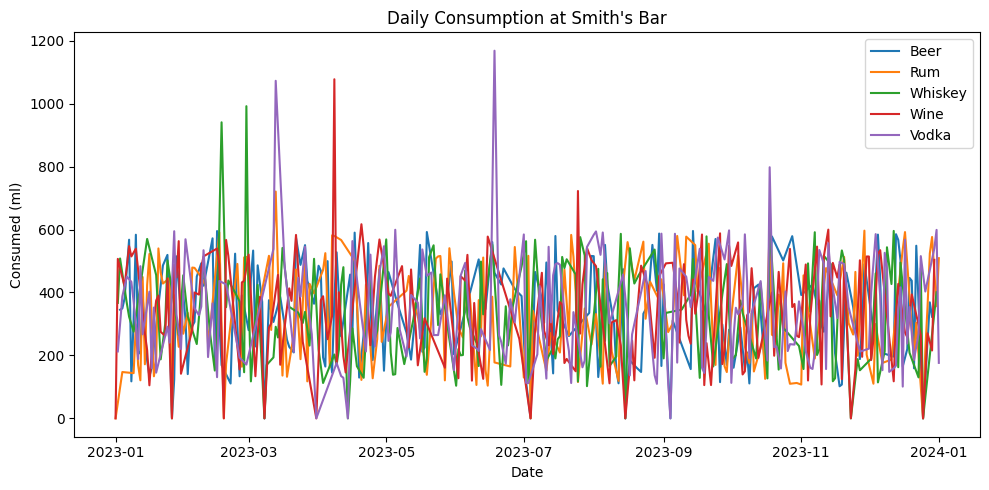

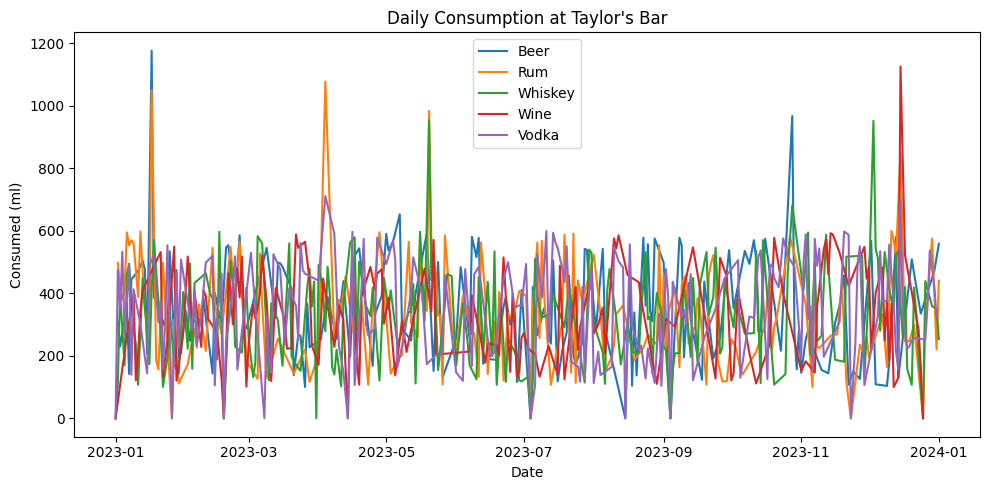

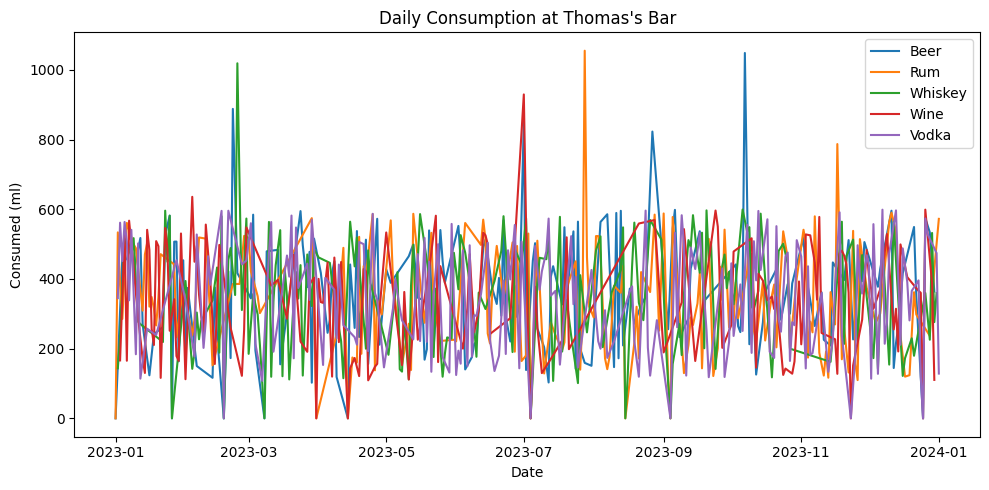

In [32]:
for bar in bars:
    plt.figure(figsize=(10, 5))
    for alcohol in alcohol_types:
        data = daily_consumption[(daily_consumption["Bar Name"] == bar) &
                                 (daily_consumption["Alcohol Type"] == alcohol)]
        if not data.empty:
            plt.plot(data["Date"], data["Consumed (ml)"], label=alcohol)

    plt.title(f"Daily Consumption at {bar}")
    plt.xlabel("Date")
    plt.ylabel("Consumed (ml)")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [16]:
# Hourly consumption analysis
hourly_consumption = df.groupby(["Bar Name", "Alcohol Type", "Hour"])["Consumed (ml)"].mean().reset_index()
print("Average Hourly Consumption (ml)")
print(hourly_consumption)
print(hourly_consumption["Bar Name"].unique())

Average Hourly Consumption (ml)
           Bar Name Alcohol Type  Hour  Consumed (ml)
0    Anderson's Bar         Beer    10     388.328235
1    Anderson's Bar         Beer    11     378.150000
2    Anderson's Bar         Beer    12     339.584000
3    Anderson's Bar         Beer    13     310.958333
4    Anderson's Bar         Beer    14     400.965000
..              ...          ...   ...            ...
385    Thomas's Bar         Wine    18     394.054000
386    Thomas's Bar         Wine    19     344.914762
387    Thomas's Bar         Wine    20     305.740714
388    Thomas's Bar         Wine    21     291.392222
389    Thomas's Bar         Wine    22     372.493846

[390 rows x 4 columns]
["Anderson's Bar" "Brown's Bar" "Johnson's Bar" "Smith's Bar"
 "Taylor's Bar" "Thomas's Bar"]


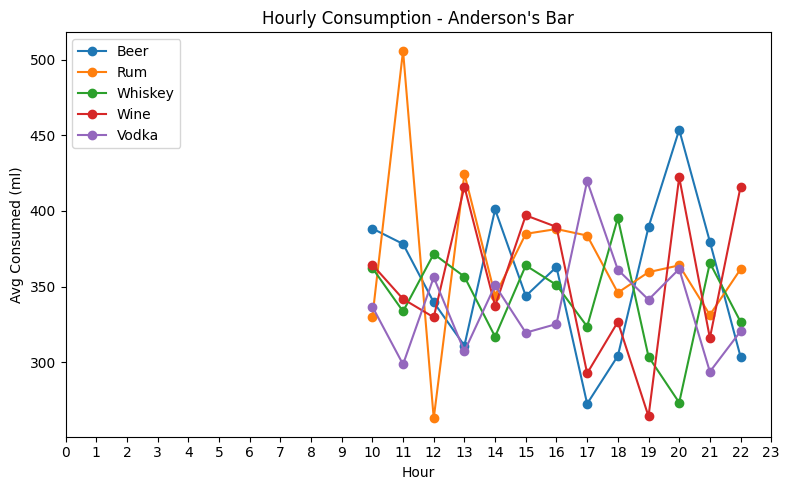

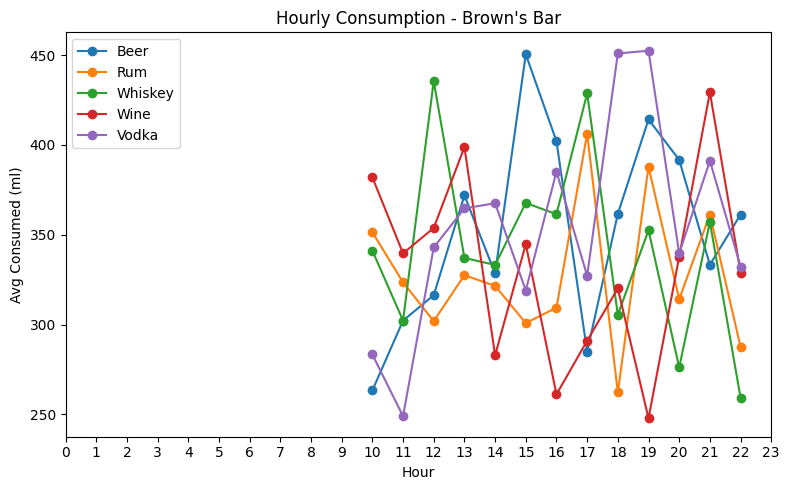

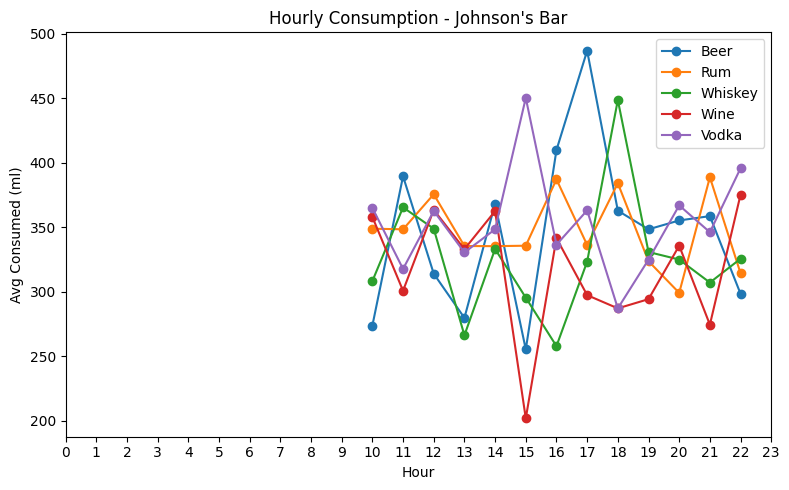

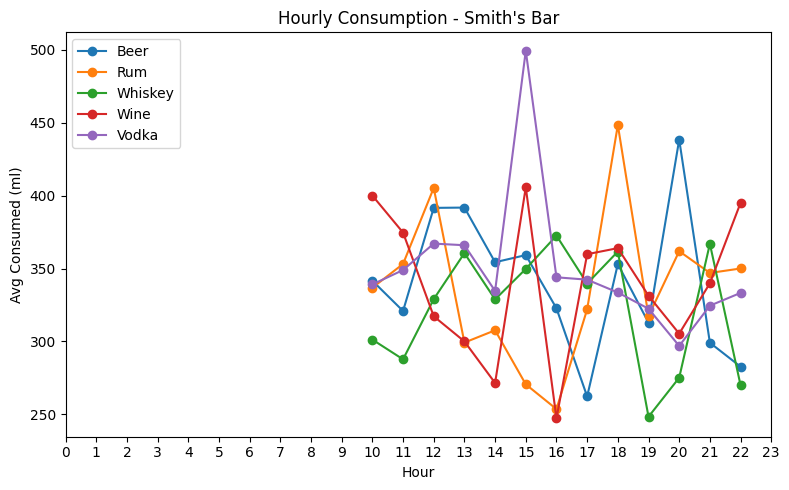

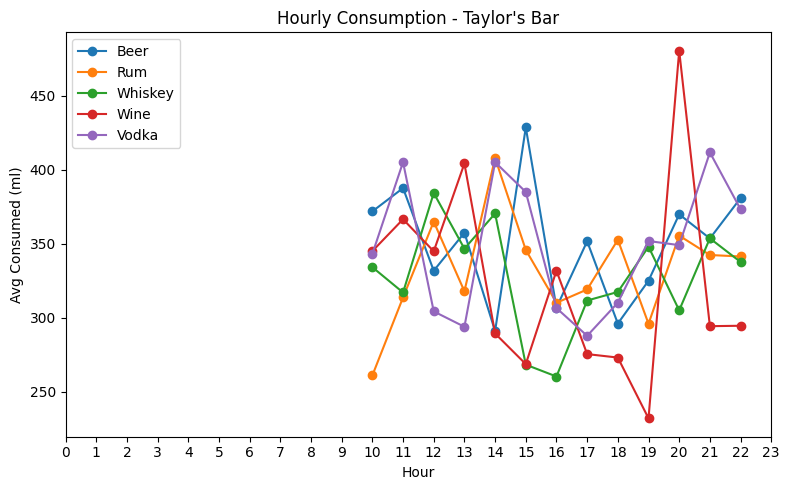

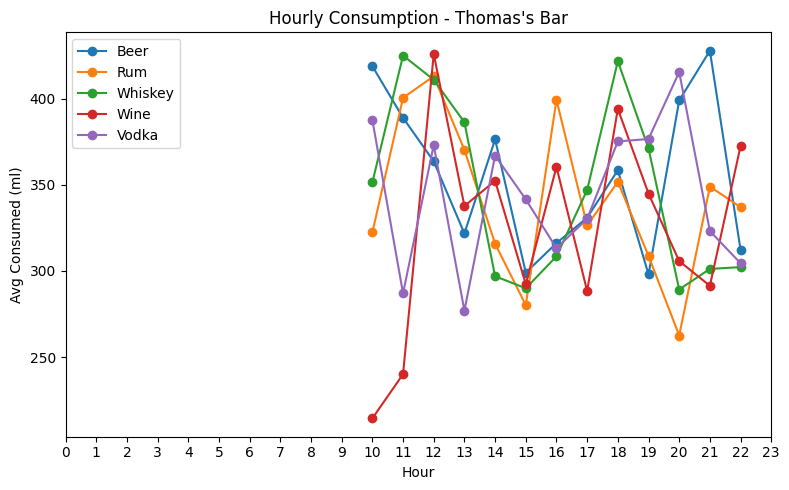

In [33]:
for bar in bars:
    plt.figure(figsize=(8, 5))
    for alcohol in alcohol_types:
        data = hourly_consumption[
            (hourly_consumption["Bar Name"] == bar) &
            (hourly_consumption["Alcohol Type"] == alcohol)
        ]
        if not data.empty:
            plt.plot(data["Hour"], data["Consumed (ml)"], label=alcohol, marker='o')

    plt.title(f"Hourly Consumption - {bar}")
    plt.xlabel("Hour")
    plt.ylabel("Avg Consumed (ml)")
    plt.legend()
    plt.xticks(range(0, 24))
    plt.tight_layout()
    plt.show()


In [34]:
# Day of week consumption analysis
daily_consumption_with_day = daily_consumption.merge(
    df[["Date", "Day of Week"]].drop_duplicates(),
    on="Date",
    how="left"
)
day_of_week_consumption = daily_consumption_with_day.groupby(["Bar Name", "Day of Week"])["Consumed (ml)"].mean().reset_index()
print("Average Consumption by Day of Week (ml)")
print(day_of_week_consumption)

Average Consumption by Day of Week (ml)
          Bar Name Day of Week  Consumed (ml)
0   Anderson's Bar      Friday     374.913893
1   Anderson's Bar      Monday     317.973651
2   Anderson's Bar    Saturday     360.770142
3   Anderson's Bar      Sunday     341.854722
4   Anderson's Bar    Thursday     354.738033
5   Anderson's Bar     Tuesday     348.165167
6   Anderson's Bar   Wednesday     365.533957
7      Brown's Bar      Friday     329.925333
8      Brown's Bar      Monday     337.751128
9      Brown's Bar    Saturday     358.400923
10     Brown's Bar      Sunday     336.551618
11     Brown's Bar    Thursday     319.164419
12     Brown's Bar     Tuesday     334.181069
13     Brown's Bar   Wednesday     369.541838
14   Johnson's Bar      Friday     348.552282
15   Johnson's Bar      Monday     313.409714
16   Johnson's Bar    Saturday     315.053869
17   Johnson's Bar      Sunday     353.886296
18   Johnson's Bar    Thursday     350.667237
19   Johnson's Bar     Tuesday     339.1

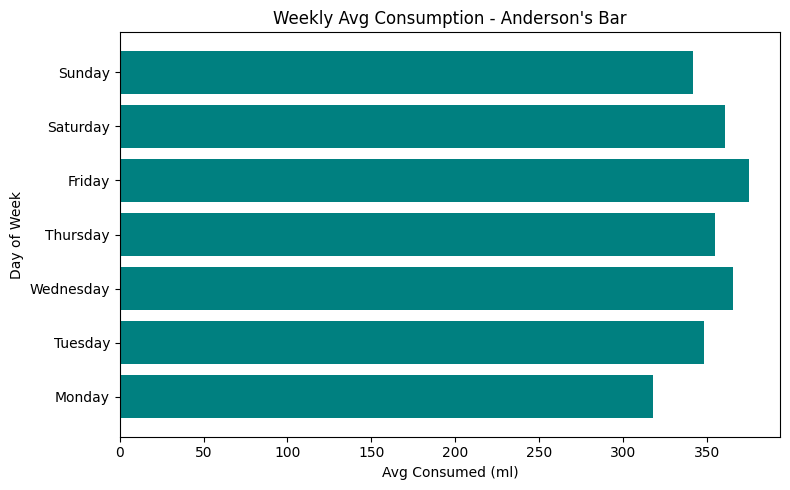

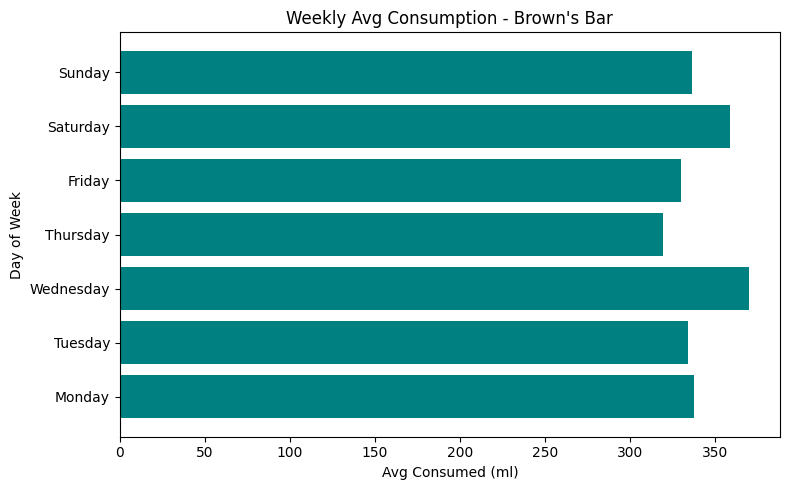

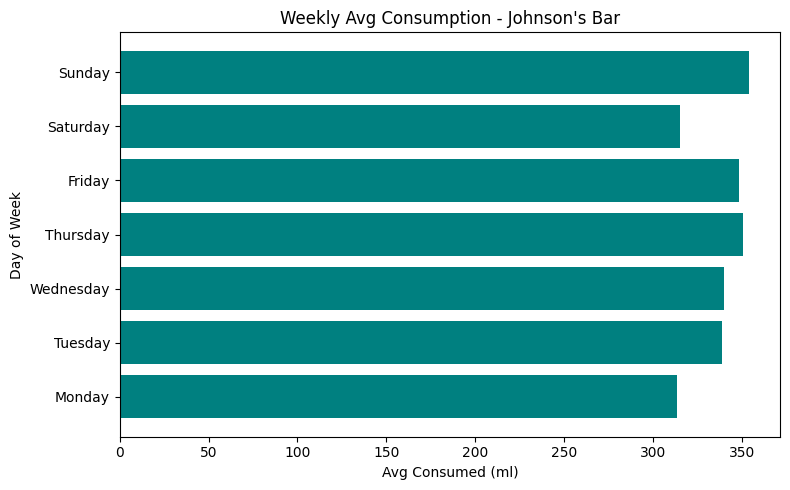

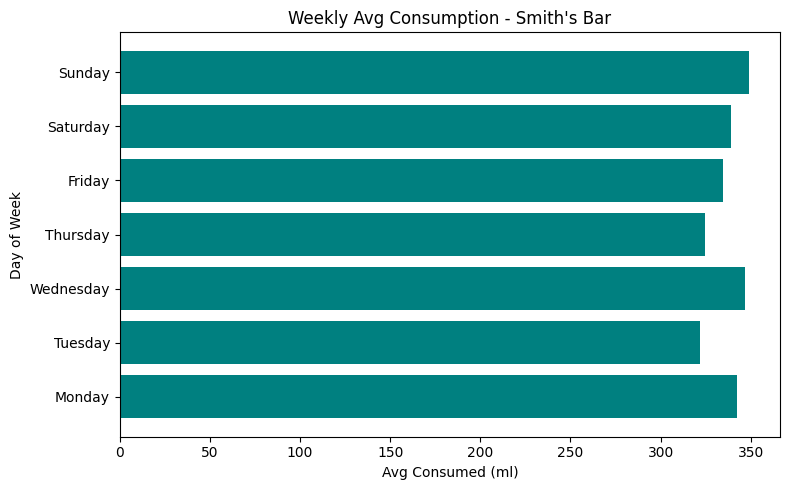

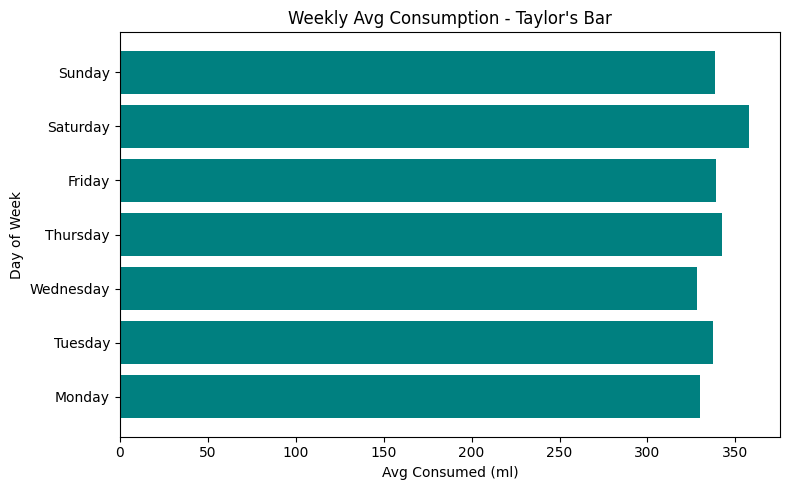

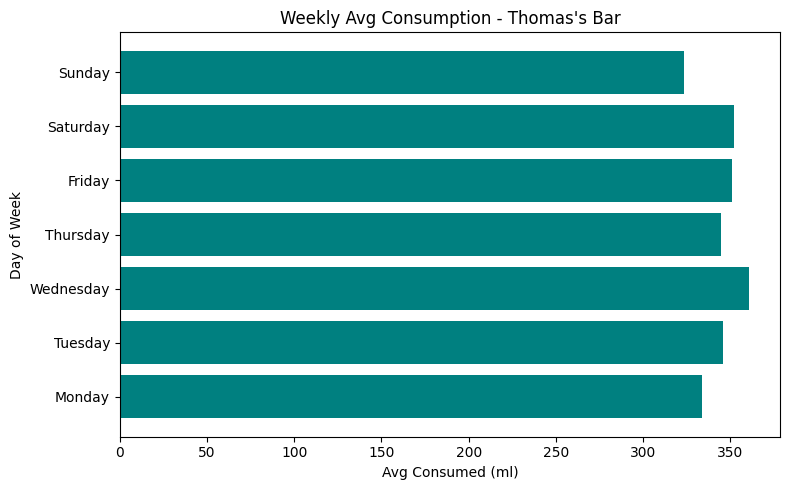

In [35]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

for bar in bars:
    plt.figure(figsize=(8, 5))
    data = day_of_week_consumption[day_of_week_consumption["Bar Name"] == bar]

    if not data.empty:
        data = data.set_index("Day of Week").reindex(day_order).reset_index()
        plt.barh(data["Day of Week"], data["Consumed (ml)"], color="teal")

    plt.title(f"Weekly Avg Consumption - {bar}")
    plt.xlabel("Avg Consumed (ml)")
    plt.ylabel("Day of Week")
    plt.tight_layout()
    plt.show()


In [36]:
# Using groupby and apply with idxmax alternative approach

def get_peak_day(group):
    max_idx = group["Consumed (ml)"].idxmax()
    return group.loc[max_idx, ["Day of Week", "Consumed (ml)"]]

# Apply function per bar
peak_days_info = day_of_week_consumption.groupby("Bar Name").apply(get_peak_day).reset_index()

print("Peak Demand Days by Bar")
print(peak_days_info)


Peak Demand Days by Bar
         Bar Name Day of Week  Consumed (ml)
0  Anderson's Bar      Friday     374.913893
1     Brown's Bar   Wednesday     369.541838
2   Johnson's Bar      Sunday     353.886296
3     Smith's Bar      Sunday     348.776618
4    Taylor's Bar    Saturday     357.460806
5    Thomas's Bar   Wednesday     360.412602


<ipython-input-36-9ab59d90218e>:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  peak_days_info = day_of_week_consumption.groupby("Bar Name").apply(get_peak_day).reset_index()


#Forecasting Beverage Demand Using Prophet

In [37]:
from datetime import datetime, timedelta

# Define the end date and calculate start date (7 days before end date)
end_date = datetime.strptime("2024-01-01", "%Y-%m-%d").date()
start_date = end_date - timedelta(days=7)

# Use between() method to filter rows between start_date and end_date inclusive
recent_data = daily_consumption[daily_consumption["Date"].between(start_date, end_date)]

print(recent_data)


            Date        Bar Name Alcohol Type  Consumed (ml)
5458  2023-12-25  Anderson's Bar      Whiskey           0.00
5459  2023-12-25     Brown's Bar         Beer           0.00
5460  2023-12-25     Brown's Bar          Rum           0.00
5461  2023-12-25     Brown's Bar      Whiskey           0.00
5462  2023-12-25     Brown's Bar         Wine           0.00
...          ...             ...          ...            ...
5571  2024-01-01    Taylor's Bar         Beer         558.72
5572  2024-01-01    Taylor's Bar          Rum         440.76
5573  2024-01-01    Taylor's Bar      Whiskey         253.33
5574  2024-01-01    Thomas's Bar          Rum         572.60
5575  2024-01-01    Thomas's Bar        Vodka         128.52

[118 rows x 4 columns]


In [38]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

forecast_results = []

for bar_name in bars:
    for alc_type in alcohol_types:
        data_subset = daily_consumption.query(
            '`Bar Name` == @bar_name and `Alcohol Type` == @alc_type'
        )
        if data_subset.empty:
            continue

        # Prepare data for Prophet with renamed columns
        prophet_data = data_subset.rename(columns={"Date": "ds", "Consumed (ml)": "y"})
        prophet_data["ds"] = pd.to_datetime(prophet_data["ds"])

        # Instantiate Prophet model with required seasonalities
        prophet_model = Prophet(daily_seasonality=True, weekly_seasonality=True, yearly_seasonality=False)
        prophet_model.fit(prophet_data)

        # Generate future dates for next 7 days without history
        future_dates = prophet_model.make_future_dataframe(periods=7, include_history=False)

        # Predict future consumption
        forecast_df = prophet_model.predict(future_dates)

        # Filter forecast to only last 7 days (from start_date)
        filtered_forecast = forecast_df[forecast_df["ds"].dt.date >= start_date]

        # Calculate average predicted consumption and uncertainty
        avg_pred = filtered_forecast["yhat"].mean()
        uncertainty_margin = (filtered_forecast["yhat_upper"] - filtered_forecast["yhat"]).mean()

        # Save forecast results
        forecast_results.append({
            "Bar Name": bar_name,
            "Alcohol Type": alc_type,
            "Avg Consumption": avg_pred,
            "Uncertainty": uncertainty_margin
        })

        # Plot example for first bar and alcohol type only
        if bar_name == bars[0] and alc_type == alcohol_types[0]:
            fig = prophet_model.plot(forecast_df)
            plt.title(f"Prophet Forecast: {bar_name} - {alc_type}")
            plt.savefig(f"prophet_forecast_{bar_name.replace(' ', '_')}_{alc_type}.png")
            plt.close()

forecast_results_df = pd.DataFrame(forecast_results)
print("Forecasted Daily Consumption (Last 7 Days) using Prophet")
print(forecast_results_df)


DEBUG:cmdstanpy:input tempfile: /tmp/tmpubwu_t0i/n6vb2q8k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubwu_t0i/4auund4m.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46920', 'data', 'file=/tmp/tmpubwu_t0i/n6vb2q8k.json', 'init=/tmp/tmpubwu_t0i/4auund4m.json', 'output', 'file=/tmp/tmpubwu_t0i/prophet_modelslm7grom/prophet_model-20250602071528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:15:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:15:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubwu_t0i/rwn4qtdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpubwu_t0i/2nn1kmx3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

Forecasted Daily Consumption (Last 7 Days) using Prophet
          Bar Name Alcohol Type  Avg Consumption  Uncertainty
0   Anderson's Bar         Beer       367.080994   207.590723
1   Anderson's Bar          Rum       378.334497   211.216743
2   Anderson's Bar      Whiskey       349.539009   215.125894
3   Anderson's Bar         Wine       364.972925   237.093290
4   Anderson's Bar        Vodka       355.855991   200.210158
5      Brown's Bar         Beer       354.128050   226.689615
6      Brown's Bar          Rum       316.018675   195.328909
7      Brown's Bar      Whiskey       358.970401   214.538296
8      Brown's Bar         Wine       319.103890   209.613975
9      Brown's Bar        Vodka       354.399667   213.393955
10   Johnson's Bar         Beer       356.482270   230.073110
11   Johnson's Bar          Rum       315.730473   191.922056
12   Johnson's Bar      Whiskey       327.519372   209.905359
13   Johnson's Bar         Wine       340.989952   221.657270
14   Johnson'

#Par Level Estimation for Stock Management

In [39]:
import numpy as np

# Constants
lead_days = 3
safety_multiplier = 1.5

# Calculate par levels with rounding up to nearest 100 ml
def calculate_par_level(row):
    base_stock = row["Avg Consumption"] * lead_days
    safety_stock = row["Uncertainty"] * safety_multiplier
    total_stock = base_stock + safety_stock
    # Round up to nearest 100 ml
    return np.ceil(total_stock / 100) * 100

# Apply the calculation
forecast_results_df["Par Level (ml)"] = forecast_results_df.apply(calculate_par_level, axis=1)

print("Recommended Par Levels")
print(forecast_results_df[["Bar Name", "Alcohol Type", "Avg Consumption", "Par Level (ml)"]])


Recommended Par Levels
          Bar Name Alcohol Type  Avg Consumption  Par Level (ml)
0   Anderson's Bar         Beer       367.080994          1500.0
1   Anderson's Bar          Rum       378.334497          1500.0
2   Anderson's Bar      Whiskey       349.539009          1400.0
3   Anderson's Bar         Wine       364.972925          1500.0
4   Anderson's Bar        Vodka       355.855991          1400.0
5      Brown's Bar         Beer       354.128050          1500.0
6      Brown's Bar          Rum       316.018675          1300.0
7      Brown's Bar      Whiskey       358.970401          1400.0
8      Brown's Bar         Wine       319.103890          1300.0
9      Brown's Bar        Vodka       354.399667          1400.0
10   Johnson's Bar         Beer       356.482270          1500.0
11   Johnson's Bar          Rum       315.730473          1300.0
12   Johnson's Bar      Whiskey       327.519372          1300.0
13   Johnson's Bar         Wine       340.989952          1400.0
14

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


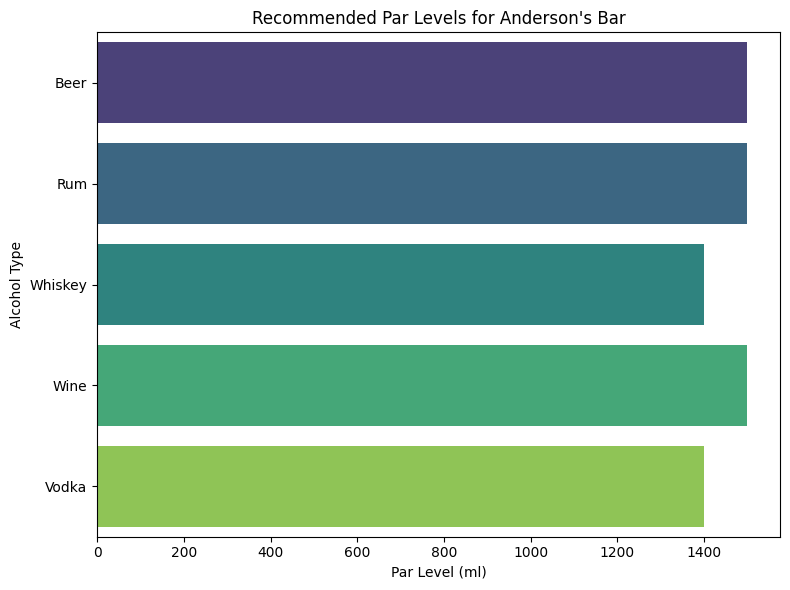

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


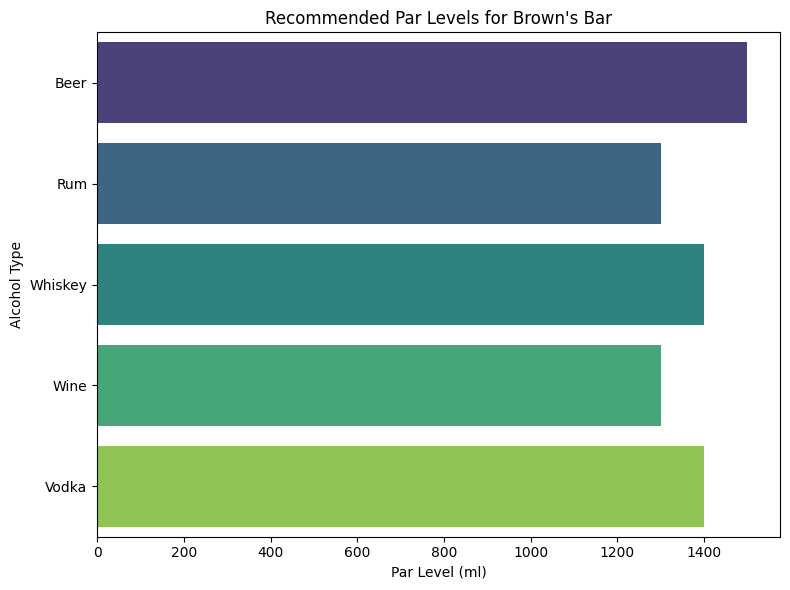

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


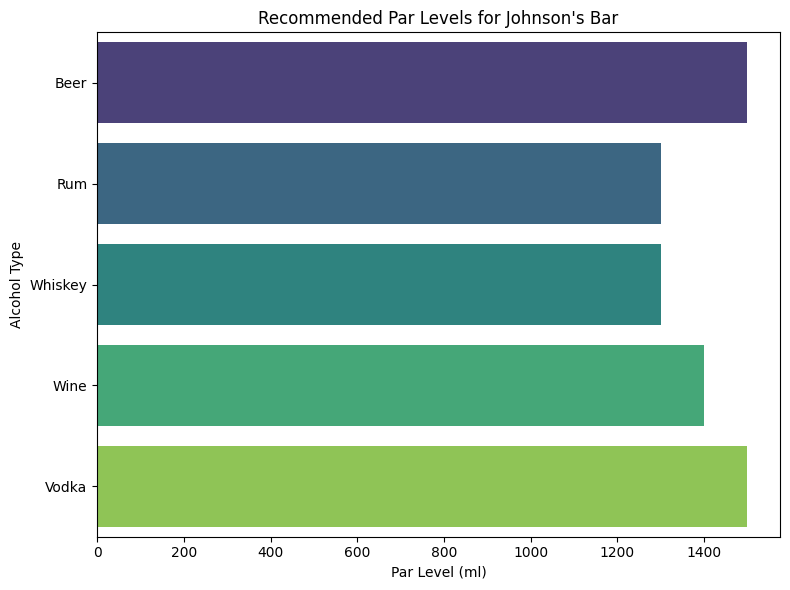

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


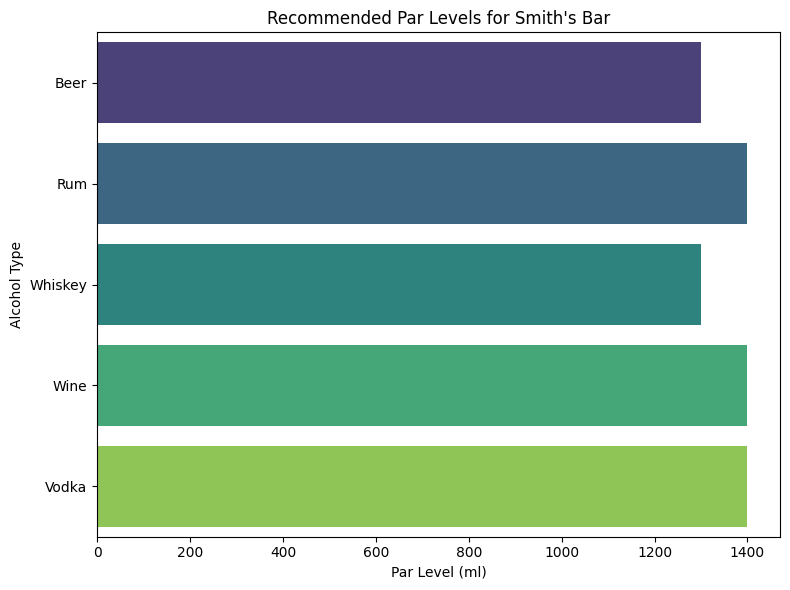

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


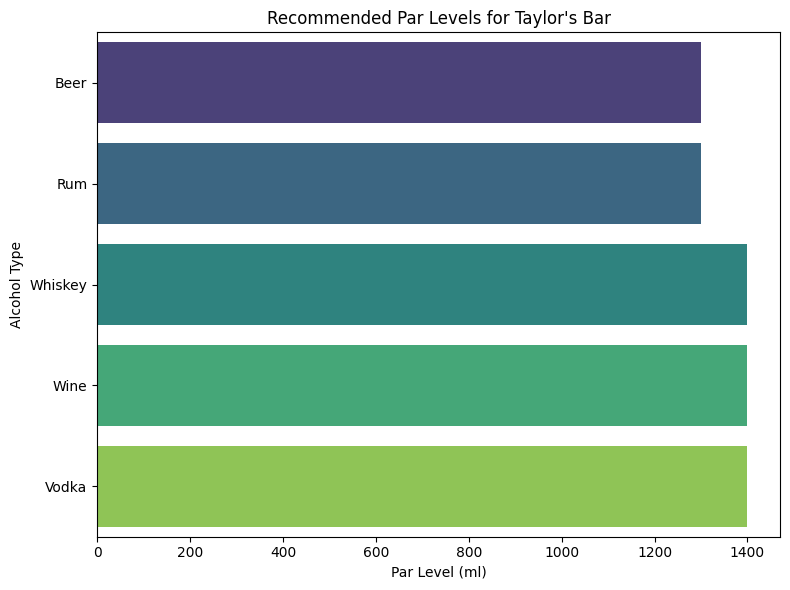

<ipython-input-40-0d4129f94867>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")


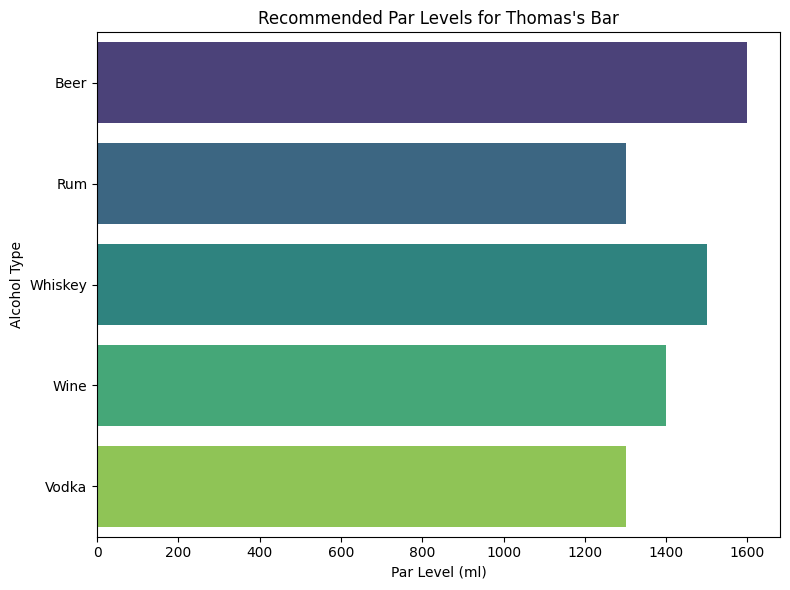

In [40]:
import seaborn as sns
#It creates horizontal bar plots showing recommended par levels for each alcohol type in every bar.
for bar in bars:
    subset = forecast_results_df[forecast_results_df["Bar Name"] == bar]
    plt.figure(figsize=(8, 6))
    sns.barplot(x="Par Level (ml)", y="Alcohol Type", data=subset, palette="viridis")
    plt.title(f"Recommended Par Levels for {bar}")
    plt.xlabel("Par Level (ml)")
    plt.ylabel("Alcohol Type")
    plt.tight_layout()
    plt.savefig(f"par_levels_horizontal_{bar.replace(' ', '_')}.png")
    plt.show()
    plt.close()


#Inventory & Demand Simulation

In [41]:
# Aggregate closing balances by date, bar, and alcohol type
closing_balances = df.groupby(["Date", "Bar Name", "Alcohol Type"], as_index=False)["Closing Balance (ml)"].sum()

# Merge the recent daily consumption data with closing balances
simulation_data = pd.merge(recent_data, closing_balances, on=["Date", "Bar Name", "Alcohol Type"], how="left")


In [42]:
# Initialize simulation results
simulation_results = []
for _, row in forecast_results_df.iterrows():
    bar = row["Bar Name"]
    alcohol = row["Alcohol Type"]
    par_level = row["Par Level (ml)"]
    subset = simulation_data[(simulation_data["Bar Name"] == bar) & (simulation_data["Alcohol Type"] == alcohol)]

    # Count stockouts (balance < 100 ml) and overstocks (balance > 2 * par_level)
    stockouts = len(subset[subset["Closing Balance (ml)"] < 100])
    overstocks = len(subset[subset["Closing Balance (ml)"] > 2 * par_level])

    simulation_results.append({
        "Bar Name": bar,
        "Alcohol Type": alcohol,
        "Avg Consumption (ml)": row["Avg Consumption"],
        "Par Level (ml)": par_level,
        "Stockouts": stockouts,
        "Overstocks": overstocks
    })

simulation_df = pd.DataFrame(simulation_results)
print("Simulation Results (Last 7 Days)")
print(simulation_df)

Simulation Results (Last 7 Days)
          Bar Name Alcohol Type  Avg Consumption (ml)  Par Level (ml)  \
0   Anderson's Bar         Beer            367.080994          1500.0   
1   Anderson's Bar          Rum            378.334497          1500.0   
2   Anderson's Bar      Whiskey            349.539009          1400.0   
3   Anderson's Bar         Wine            364.972925          1500.0   
4   Anderson's Bar        Vodka            355.855991          1400.0   
5      Brown's Bar         Beer            354.128050          1500.0   
6      Brown's Bar          Rum            316.018675          1300.0   
7      Brown's Bar      Whiskey            358.970401          1400.0   
8      Brown's Bar         Wine            319.103890          1300.0   
9      Brown's Bar        Vodka            354.399667          1400.0   
10   Johnson's Bar         Beer            356.482270          1500.0   
11   Johnson's Bar          Rum            315.730473          1300.0   
12   Johnson's Bar

#Data-Driven Insights

In [43]:
# Calculate variability ratio (par level relative to average consumption)
forecast_results_df["Variability Ratio"] = forecast_results_df.apply(
    lambda row: row["Par Level (ml)"] / (row["Avg Consumption"] if row["Avg Consumption"] > 0 else 1e-10),
    axis=1
)

# Find the row with maximum variability ratio
idx_max_var = forecast_results_df["Variability Ratio"].idxmax()
most_variable = forecast_results_df.loc[idx_max_var]

# Construct the insight message
insight_msg = (
    f"Insight:\nBar '{most_variable['Bar Name']}' shows highest variability in '{most_variable['Alcohol Type']}' consumption.\n"
    f"Par Level is {most_variable['Variability Ratio']:.2f} times the average daily consumption,\n"
    "indicating possible large fluctuations in demand or inventory issues."
)

print(insight_msg)


Insight:
Bar 'Taylor's Bar' shows highest variability in 'Rum' consumption.
Par Level is 4.40 times the average daily consumption,
indicating possible large fluctuations in demand or inventory issues.


#Conclusion

In [44]:
# Calculate variability ratio safely
forecast_results_df["Variability Ratio"] = forecast_results_df.apply(
    lambda row: row["Par Level (ml)"] / (row["Avg Consumption"] if row["Avg Consumption"] > 0 else 1e-10),
    axis=1
)

# For each bar, find the alcohol type with the highest variability ratio
max_var_per_bar = forecast_results_df.loc[forecast_results_df.groupby("Bar Name")["Variability Ratio"].idxmax()]

# Print insights per bar
for _, row in max_var_per_bar.iterrows():
    print(f"Bar: {row['Bar Name']}")
    print(f"Alcohol Type with Highest Variability: {row['Alcohol Type']}")
    print(f"Variability Ratio: {row['Variability Ratio']:.2f}")
    print(f"Par Level: {row['Par Level (ml)']:.0f} ml, Average Consumption: {row['Avg Consumption']:.2f} ml")
    print("This indicates possible demand spikes or inventory issues.\n")


Bar: Anderson's Bar
Alcohol Type with Highest Variability: Wine
Variability Ratio: 4.11
Par Level: 1500 ml, Average Consumption: 364.97 ml
This indicates possible demand spikes or inventory issues.

Bar: Brown's Bar
Alcohol Type with Highest Variability: Beer
Variability Ratio: 4.24
Par Level: 1500 ml, Average Consumption: 354.13 ml
This indicates possible demand spikes or inventory issues.

Bar: Johnson's Bar
Alcohol Type with Highest Variability: Beer
Variability Ratio: 4.21
Par Level: 1500 ml, Average Consumption: 356.48 ml
This indicates possible demand spikes or inventory issues.

Bar: Smith's Bar
Alcohol Type with Highest Variability: Wine
Variability Ratio: 4.23
Par Level: 1400 ml, Average Consumption: 330.97 ml
This indicates possible demand spikes or inventory issues.

Bar: Taylor's Bar
Alcohol Type with Highest Variability: Rum
Variability Ratio: 4.40
Par Level: 1300 ml, Average Consumption: 295.61 ml
This indicates possible demand spikes or inventory issues.

Bar: Thomas's B

In [45]:
# Calculate average consumption per Bar, Alcohol Type, and Hour
hourly_avg = df.groupby(["Bar Name", "Alcohol Type", "Hour"])["Consumed (ml)"].mean().reset_index()

# Calculate variability per Bar and Alcohol Type as the ratio of max to mean hourly consumption
variability_hourly = hourly_avg.groupby(["Bar Name", "Alcohol Type"]).agg(
    max_hourly_consumption=("Consumed (ml)", "max"),
    mean_hourly_consumption=("Consumed (ml)", "mean")
).reset_index()

variability_hourly["Variability Ratio"] = variability_hourly["max_hourly_consumption"] / (variability_hourly["mean_hourly_consumption"] + 1e-10)
